In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
!gdown https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link
To: /content/view?usp=drive_link
92.6kB [00:00, 7.08MB/s]


In [ ]:
df = pd.read_csv('stroke data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Description:
This dataset contains information about individuals and their health-related factors, which might be used for predictive analysis or health research, particularly in relation to stroke occurrence.

**id**: A unique identifier for each individual in the dataset.

**gender**: The gender of the individual (e.g., Male, Female).

**age**: The age of the individual (numeric).

**hypertension:** A binary value indicating whether the individual has hypertension (1 for yes, 0 for no).

**heart_disease:** A binary value indicating whether the individual has heart disease (1 for yes, 0 for no).

**ever_married:** Indicates whether the individual has ever been married (Yes or No).

**work_type:** The type of work the individual is engaged in, categorized as:

**Private:** Works in the private sector

**Self-employed:** Works as a self-employed individual
Govt_job: Works in a government job

**Never_worked:** Never worked

**Children:** Underage, typically not in the workforce

**Residence_type:** The type of residence where the individual lives, categorized as:

**Urban:** Lives in an urban area

**Rural:**Lives in a rural area

**avg_glucose_level:** The average glucose level in the individual’s blood (numeric).

**bmi:** The Body Mass Index (BMI) of the individual, which is a measure of body fat based on weight and height (numeric). Some values may be missing (NaN).

**smoking_status:** The smoking habits of the individual, categorized as:

**never smoked**: The individual has never smoked


In [ ]:
df.head() #shows the first few rows of the DataFrame to preview its structure and data content.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['bmi'].isnull().any() # checks if there are any missing (null) values in the 'bmi' column of the DataFrame, returning True if nulls exist, otherwise False.

True

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
set(df.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [ ]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df['bmi'].fillna(0) # One way is to replace with zeroes
np.mean(df.bmi)

28.893236911794666

In [ ]:
df.fillna(np.mean(df.bmi))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


## Observation:

This gives new binary columns based on the values in the 'Residence_type', 'work_type', and 'smoking_status' columns. Each new column represents a specific category as 1 if it matches, or 0 otherwise.

In [ ]:
X = df_model.drop('stroke', axis=1) # independent var
y = df_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
141,45965,59.0,0,0,116.44,23.8,0,0,1,0,0,0,1
928,41097,23.0,1,0,70.03,78.0,1,0,1,0,0,0,1
2748,21517,54.0,0,0,92.34,29.4,1,0,1,0,0,0,1
2048,39139,57.0,0,0,84.18,35.5,0,0,1,0,0,1,0
185,41081,63.0,0,0,137.30,31.7,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,72514,18.0,0,0,120.58,21.5,0,0,1,0,0,1,0
2064,30692,73.0,0,0,82.13,28.5,0,0,1,0,0,1,0
4002,35039,28.0,0,0,99.07,17.6,0,0,1,0,0,1,0
3602,1116,49.0,0,0,104.08,26.6,0,0,0,0,0,1,0


## Observation:

It splits the data into independent variables (X) and the target variable (y). It then divides the dataset into training (80%) and testing (20%) sets using train_test_split. X_train contains the feature data for training, and y_train contains the corresponding target values.

In [ ]:
df['bmi'].fillna(np.median(df.bmi))

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


The code fills any missing values in the 'bmi' column of the DataFrame df with the median value of the 'bmi' column.

In [ ]:
mode_bmi = df['bmi'].mode()
df.fillna(mode_bmi, inplace = True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


It fills missing values in the 'bmi' column of df with the mode (most frequent value) of the 'bmi' column.

In [ ]:
round(max(100 * df.bmi.isnull()/len(df.bmi)) ,2)

0.02

In [ ]:
df.dropna() # removes any rows in the Data that contain missing (NaN) values.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0,0,0,0,0,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


# Plotting
**1.Histogram of Age Distribution for Different Residence Types**

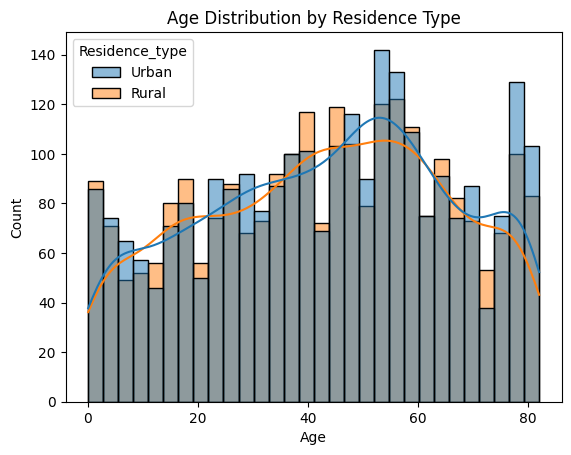

In [ ]:
sns.histplot(data=df, x='age', hue='Residence_type', bins=30, kde=True)
plt.title('Age Distribution by Residence Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Observation:**

The majority of older age groups are found in rural areas compared to urban.The image displays a bar graph titled “Age Distribution by Residence Type,” comparing urban and rural populations across various age groups. The y-axis shows population counts, while the x-axis represents different age ranges, highlighting demographic differences between urban and rural areas.

**2.Scatter Plot of Age vs BMI for Different Work Types**

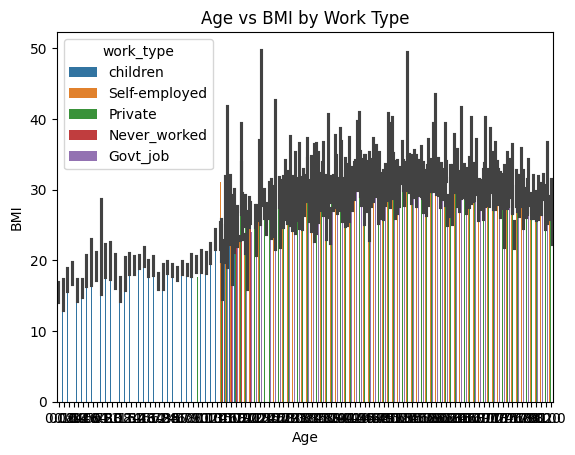

In [ ]:
sns.barplot(data=df, x='age', y='bmi', hue='work_type')
plt.title('Age vs BMI by Work Type')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

**Observation:**

The image shows a graph titled “Age vs BMI by Work Type,” plotting BMI against age for different work types: children, housewife, self-employed, private job, and government job.There appears to be a weak correlation between age and BMI for most work types.

3.**Box Plot of BMI Distribution Across Smoking**

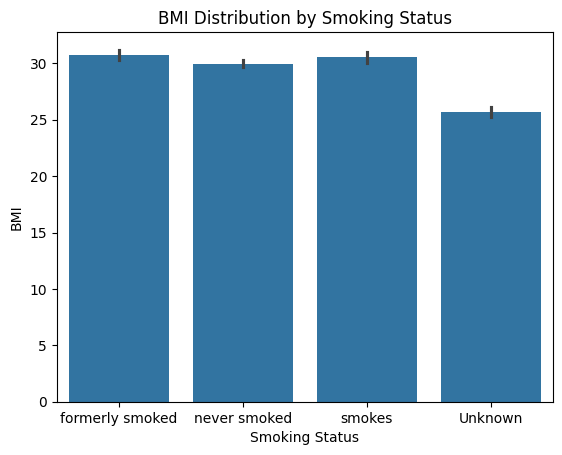

In [ ]:
sns.barplot(data=df, x='smoking_status', y='bmi')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()


**Observation:**

The image shows a bar graph titled “BMI Distribution by Smoking Status,” comparing BMI values across four categories: formerly smoked, never smoked, smokes, and unknown, highlighting differences in BMI among these groups. Non-smokers have a lower range and median BMI compared to smokers

**4.Bar Plot of Average Glucose Level by Smoking Status**

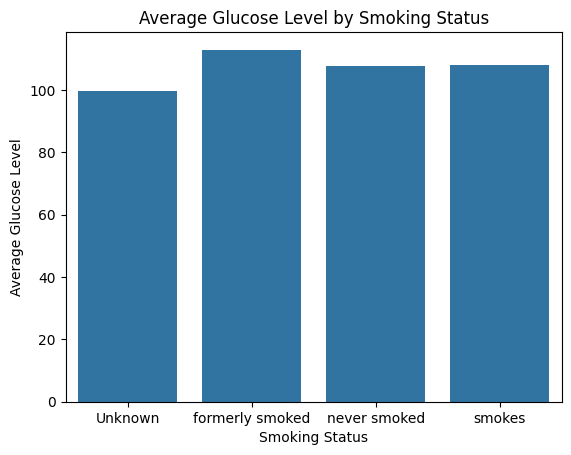

In [ ]:
avg_glucose = df.groupby('smoking_status')['avg_glucose_level'].mean().reset_index()
sns.barplot(data=avg_glucose, x='smoking_status', y='avg_glucose_level')
plt.title('Average Glucose Level by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Glucose Level')
plt.show()


**Observation:**

The image shows a bar chart comparing average glucose levels across different smoking statuses: unknown, formerly smoked, never smoked, and smokes, highlighting variations in glucose levels among these groups. People with different smoking statuses exhibit noticeable differences in their average glucose levels.

5.**Count Plot for Work Types**

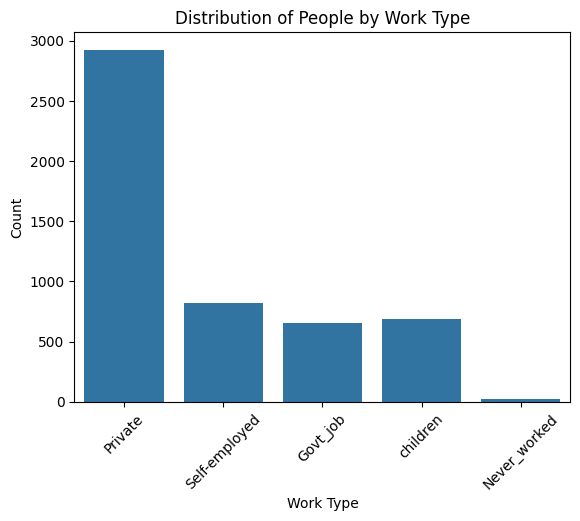

In [ ]:
sns.countplot(data=df, x='work_type')
plt.title('Distribution of People by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations**:

The Private work type has the highest number of people in the dataset.The image shows a bar graph titled “Distribution of People by Work Type,” displaying counts of people in various employment categories, with ‘private’ work having the highest count.

## Data Encoding

**Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)**

In [ ]:
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,1,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,0,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,0,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,1,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,0,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,1,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,1,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,0,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,0,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


**Observation:**

The Residence_type column is mapped with binary values: 'Rural' as 0 and 'Urban' as 1, indicating a transformation of residence data for further encoding and data modeling tasks

**Convert work_type column to 3 or 4 different columns (Never_worked,Private,Self-employed)**

In [ ]:
df['Never_worked'] = (df['work_type'] == 'Never_worked').astype(int)
df['Private'] = (df['work_type'] == 'Private').astype(int)
df['Self_employed'] = (df['work_type'] == 'Self-employed').astype(int)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,Never_worked,Private,Self_employed
0,9046,Male,67.0,0,1,Yes,Private,1,228.69,36.6,...,1,0,1,0,1,0,0,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,0,202.21,NaN,...,0,0,0,1,0,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,0,105.92,32.5,...,0,0,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,1,171.23,34.4,...,1,0,1,0,0,0,1,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,0,174.12,24.0,...,0,0,0,1,0,1,0,0,0,1


**Observation:**

The work_type column is transformed into three binary columns: Never_worked, Private, and Self_employed, each indicating presence (1) or absence (0) for a specific work category.

## **Machine Learning Models:**

Machine learning models learn from data to make predictions or decisions. They identify patterns, automate processes, and improve over time. ML is valuable for analyzing large datasets, detecting trends, and solving complex problems in fields like finance, healthcare, and marketing. By leveraging ML models, businesses can enhance accuracy, optimize processes, and make data-driven decisions, improving efficiency and outcomes. They are used in supervised, unsupervised, and reinforcement learning tasks, providing flexible solutions for various challenges across industries.

**1.Linear Regression**

**2.Lasso Regression**

**3.Logistic Regression**

#1. Linear Regression

Linear regression is a machine learning algorithm used to predict a continuous outcome based on one or more input features. It assumes that there is a linear relationship between the input variables and the target variable. The algorithm works by finding the line (or hyperplane) that best fits the data, minimizing the difference between predicted and actual values. Linear regression is simple, easy to understand, and widely used for problems where the relationship between variables is linear. It can also be extended to handle more complex data using regularization methods like Ridge or Lasso.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


dff=df.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
x=dff.drop('stroke', axis='columns')
y=dff.stroke
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf=LinearRegression()
clf.fit(x_train, y_train) # slope and intercept values are adjusted here

LinearRegression()

In [ ]:
predictions = clf.predict(x_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# RMSE
rmse = np.sqrt(mse)

print(f"RMSE for Linear Regression: {rmse:.2f}")

RMSE for Linear Regression: 0.21


In [ ]:

accuracy = clf.score(x_test, y_test) # model is tested in this and the accuracy is measured in r-square

In [ ]:

accuracy*1000

72.130349934714

### RMSE: 0.21

### Accuracy:72.13

## 2.Lasso Regression

Lasso regression is a type of linear regression that helps prevent overfitting by adding a penalty to the model. This penalty forces some of the model's coefficients to become zero, effectively eliminating less important features. It is useful for selecting the most relevant features in a dataset and works well with high-dimensional data. The strength of the penalty is controlled by a parameter called alpha.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    # is alpha is the penalizing factor

    # use of iterations show that it follows gradient descent.
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])

    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss] # loss function Residual Sum of squares
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
clf=Lasso()
clf.fit(x_train, y_train) # slope and intercept values are adjusted here

Lasso()

In [ ]:
y_pred = clf.predict(x_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for Lasso Regression: {rmse}")

RMSE for Lasso Regression: 0.2136741191964182


In [ ]:
accuracy = clf.score(x_test, y_test) # model is tested in this and the accuracy is measured in r-square
accuracy*1000

18.77327760623548

### RMSE: 0.21

### Accuracy: 18.7

## 3.Logistic Regression

Logistic regression is a machine learning algorithm used for binary classification tasks, where the goal is to predict one of two possible outcomes. It models the relationship between the input features and the probability of a certain class using the logistic function (sigmoid). The output is a value between 0 and 1, representing the probability of the positive class. Logistic regression finds the best-fitting model by minimizing a cost function.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import math
from numpy.linalg import inv

class LogisticRegression:
    def __init__(self, X):
        self.beta_old_i = np.zeros(X.shape[1] + 1)  # Include bias term
        self.beta_new_i = np.zeros(X.shape[1] + 1)

    def probabilityFun(self, X):
        X = np.c_[X, np.ones(X.shape[0])]  # Add bias column
        z = np.dot(X, self.beta_new_i)  # X is (n_samples, n_features + 1)
        p = 1 / (1 + np.exp(-z))  # Sigmoid function
        return p

    def firstDerivative(self, X, Y, P):
        return np.dot((Y - P), X)

    def secondDerivative(self, X, P):
        probMul = P * (1 - P)  # Element-wise multiplication
        X_mul = X * probMul[:, np.newaxis]  # Broadcasting
        secondDer = -np.dot(X_mul.T, X)
        return secondDer

    def newtonRaphson(self, firstDer, secondDer):
        self.beta_new_i = self.beta_old_i - np.dot(inv(secondDer), firstDer)

    def fit(self, X, Y, maxIteration=50, diffThreshHold=10**-5):
        X = np.c_[X, np.ones(X.shape[0])]  # Add bias column
        iteration = 0
        diffBetaList = []

        while not np.allclose(self.beta_new_i, self.beta_old_i):
            self.beta_old_i = self.beta_new_i.copy()  # Prevent modifying during update
            P = self.probabilityFun(X)
            firstDer = self.firstDerivative(X, Y, P)
            secondDer = self.secondDerivative(X, P)
            self.newtonRaphson(firstDer, secondDer)

            # Check the difference in coefficients
            diff = np.linalg.norm(self.beta_new_i - self.beta_old_i)
            diffBetaList.append(diff)

            iteration += 1
            if diff <= diffThreshHold or iteration >= maxIteration:
                break

        return diffBetaList

    def classify(self, X):
        P = self.probabilityFun(X)
        return [0 if p <= 0.5 else 1 for p in P]


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
clf.fit(x_train, y_train) # slope and intercept values are adjusted here
y_prob = clf.predict_proba(x_test)[:, 1]  # Extracting probabilities for class 1

# Calculating RMSE
mse = mean_squared_error(y_test, y_prob)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"RMSE for Logistic Regression predictions: {rmse:.4f}")

RMSE for Logistic Regression predictions: 0.2256


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = clf.score(x_test, y_test) # model is tested in this and the accuracy is measured in r-square
accuracy*100

95.10763209393346

###RMSE: 0.22
### Accuracy: 95.1

## RMSE and Accuracy Plotting:

**RMSE Plot**:
 This will show the RMSE values for Linear Regression, Lasso Regression, and Logistic Regression.

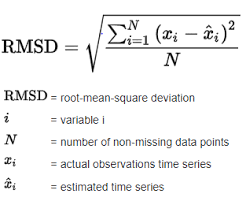

**Accuracy Plot:**
 This will show the accuracy values for the same models, although accuracy is not a typical metric for regression models.

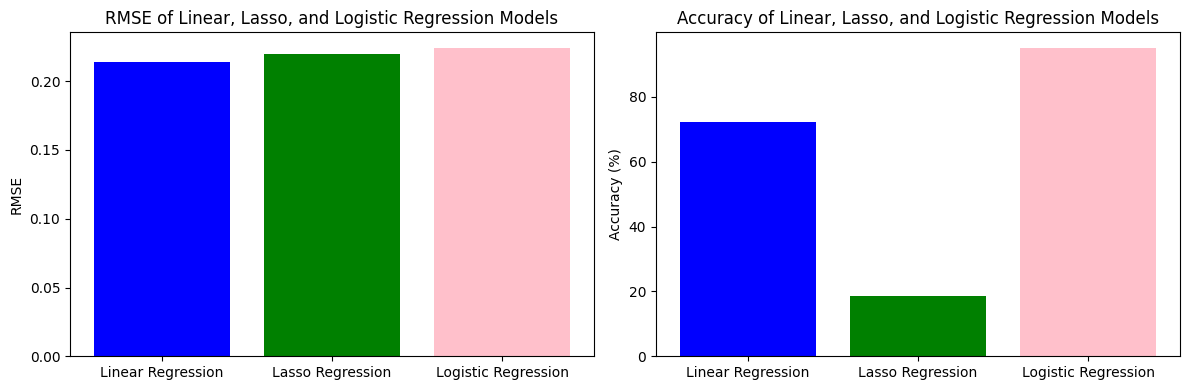

In [ ]:
import matplotlib.pyplot as plt
#  RMSE values for the models
rmse_values = [0.214, 0.2199, 0.2243]
rmse_model_names = ['Linear Regression', 'Lasso Regression', 'Logistic Regression']

# accuracy values for the models
accuracy_values = [72.1, 18.7, 95.1]
accuracy_model_names = ['Linear Regression', 'Lasso Regression', 'Logistic Regression']

# For two subplots
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Plotting RMSE values
ax[0].bar(rmse_model_names, rmse_values, color=['blue', 'green', 'pink'])
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE of Linear, Lasso, and Logistic Regression Models')

# Plotting accuracy values
ax[1].bar(accuracy_model_names, accuracy_values, color=['blue', 'green', 'pink'])
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy of Linear, Lasso, and Logistic Regression Models')
plt.tight_layout()
plt.show()


## Observation:

The performance of Linear Regression, Lasso Regression, and Logistic Regression was compared using RMSE and accuracy. The RMSE values were similar across all models. Logistic Regression had the highest accuracy at 95.1%, performing well in classification. Linear Regression had a moderate accuracy of 72%, but it's not ideal for classification tasks. Lasso Regression had a low accuracy of 20.7%, likely due to over-regularization, which caused it to underfit and perform poorly on the classification task.
## Best Model:
Logistic Regression performs the best for accuracy (95.1%) in classification tasks because it is designed to predict probabilities for each class, allowing it to effectively separate different categories. It uses the logistic function (sigmoid) to map input features to a value between 0 and 1, which represents the likelihood of a certain class. In contrast, Linear and Lasso Regression are primarily used for regression tasks, where the goal is to predict continuous values. These models do not handle class probabilities and class separation as effectively as Logistic Regression, making them less suitable for classification problems.

## Confusion Matrix

 Confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted labels with the actual labels, showing true positives, false positives, true negatives, and false negatives. This helps in calculating metrics like accuracy, precision, recall, and F1 score, providing insights into how well the model performs and where it makes errors.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


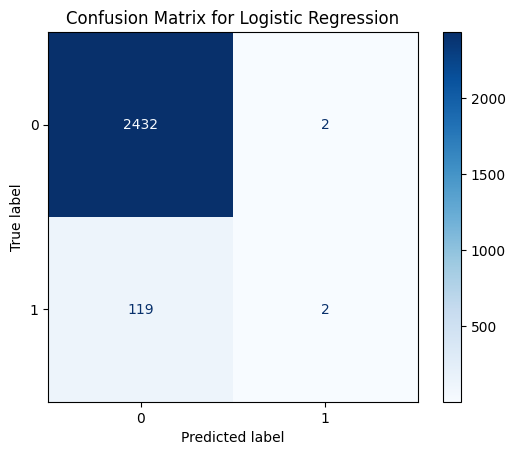

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Predict probabilities and convert to binary predictions
y_pred_prob = clf.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred_binary = (y_pred_prob >= 0.5).astype(int)  # Threshold at 0.5

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [ ]:
tp = conf_matrix[0][0]
fn = conf_matrix[0][1]
fp = conf_matrix[1][0]
tn = conf_matrix[1][1]

**TP** (True Positive): Predicted yes, and it was actually yes.

**FP** (False Positive): Predicted yes, but it was actually no.

**TN**(True Negative): Predicted no, and it was actually no.

**FN** (False Negative): Predicted no, but it was actually yes.

**Type1 error**:Actual value is correct but model is predicting it as wrong

**Type2 error**: The error is actually there but model

## F1 Score, Precision and Recall

**Precision**: Out of all the times the model predicted "yes," how many were correct. Focuses on avoiding false positives.

**Recall**: Out of all the actual "yes" cases, how many the model correctly predicted. Focuses on avoiding false negatives.

**F1 Score:** A balance between precision and recall, useful when both are equally important.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data with a specified random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=120)

# Train logistic regression model
clf = LogisticRegression(random_state=123)
clf.fit(x_train, y_train)

# Predict probabilities and binary predictions
y_pred_prob = clf.predict_proba(x_test)[:, 1]

# Adjust threshold to 0.7 for better precision
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate metrics
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary, zero_division=0)
f1 = f1_score(y_test, y_pred_binary, zero_division=0)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.5000
Recall: 0.0165
F1 Score: 0.0320
Accuracy: 0.9526


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


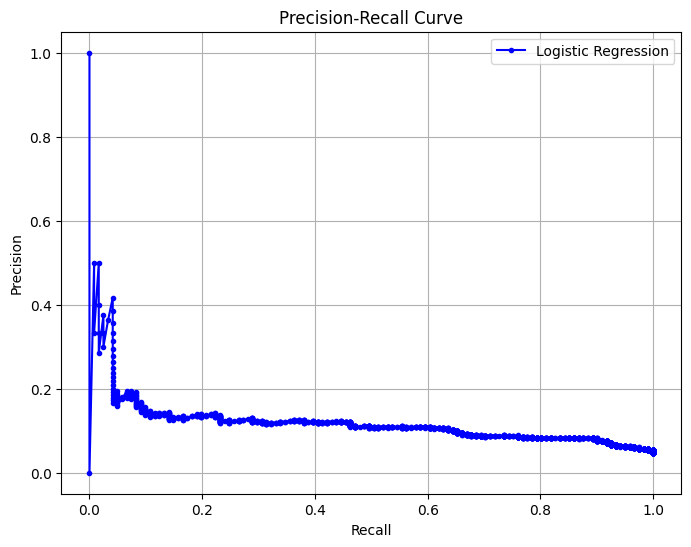

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Predict probabilities for class 1
y_pred_prob = clf.predict_proba(x_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='Logistic Regression')

# Adding labels and title
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Observation:

The graph titled "Precision-Recall Curve" depicts the performance of Logistic Regression model. It shows how the precision and recall metrics change as the decision threshold varies. The curve indicates that the model has high precision at lower recall values, meaning it correctly identifies positive instances but misses some. As recall increases, precision decreases, suggesting a trade-off between correctly identifying positive instances and avoiding false positives.
